NAME: ANANYA GODSE SAP ID: 60009220161

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [ ]:
kmeans = KMeans(init='random', n_clusters=3, n_init=10, max_iter=100, random_state=42)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
sse = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

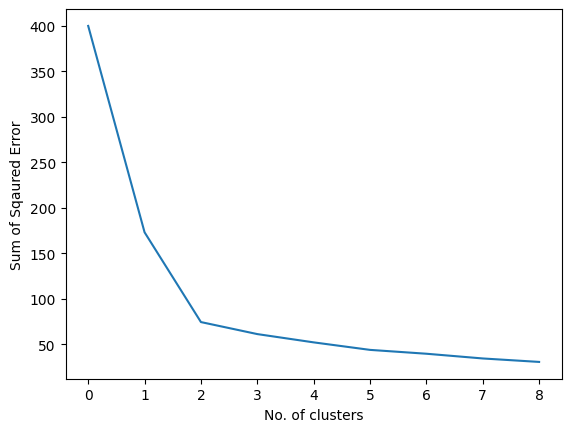

In [ ]:
plt.plot(sse)
plt.xlabel("No. of clusters")
plt.ylabel("Sum of Sqaured Error")
plt.show()

In [ ]:
sil_score = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_features)
  sil = silhouette_score(scaled_features, kmeans.fit_predict(scaled_features))
  sil_score.append(sil)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

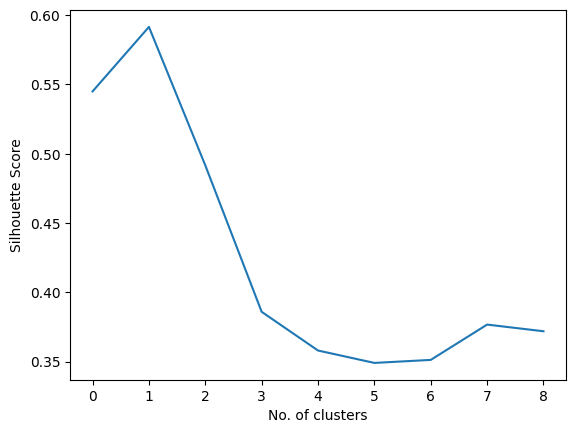

In [ ]:
plt.plot(sil_score)
plt.xlabel("No. of clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tarfile
import urllib
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

r  = urllib.request.urlretrieve(full_download_url, archive_name)

tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile,delimiter = "," , usecols=range(1,20352), skip_header=1)
true_label_names = np.genfromtxt(labels_file,delimiter = "," , usecols=range(1,), skip_header=1, dtype="str")

In [ ]:
true_label_names[:5]

array(['sample_0', 'sample_1', 'sample_2', 'sample_3', 'sample_4'],
      dtype='<U10')

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([  0,   1, 112, 223, 334])

In [ ]:
n_clusters=len(label_encoder.classes_)

In [ ]:
preprocessor = Pipeline([("scaler", MinMaxScaler()), ("pcs", PCA(n_components=2, random_state=42))])

In [ ]:
clusterer = Pipeline([("kmeans", KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42))])

In [ ]:
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pcs',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=801,
                                         n_init=50, random_state=42))]))])